Cancer Classification.  
The data comes from Kaggle (https://www.kaggle.com/datasets/erdemtaha/cancer-data)

+ id: represents a unique ID of each patient.
+ diagnosis: indicates the type of cancer. This property can take the values "M" (Malignant - Benign) or "B" (Benign - Malignant).
+ radius_mean, texture_mean, perimeter_mean, area_mean, smoothness_mean, compactness_mean, concavity_mean, concave points_mean: represents the mean values of the cancer's visual characteristics.


In [2]:
# imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, confusion_matrix, accuracy_score, classification_report, roc_auc_score, f1_score, precision_score, recall_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.linear_model import Lasso
import seaborn as sns; sns.set()
import statsmodels.api as sm
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from matplotlib.lines import Line2D


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,357,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,3.037183e+07,NaN,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,NaN,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,NaN,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,NaN,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,NaN,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,NaN,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

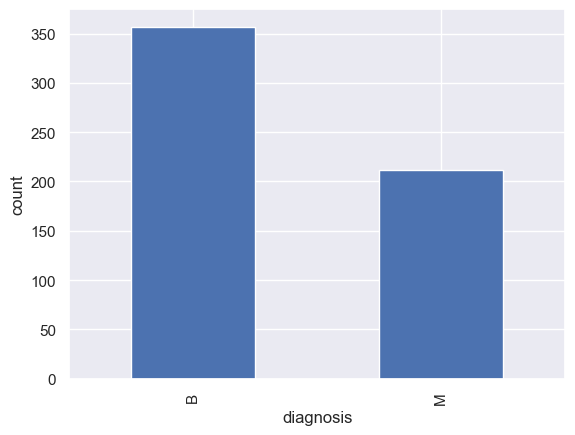

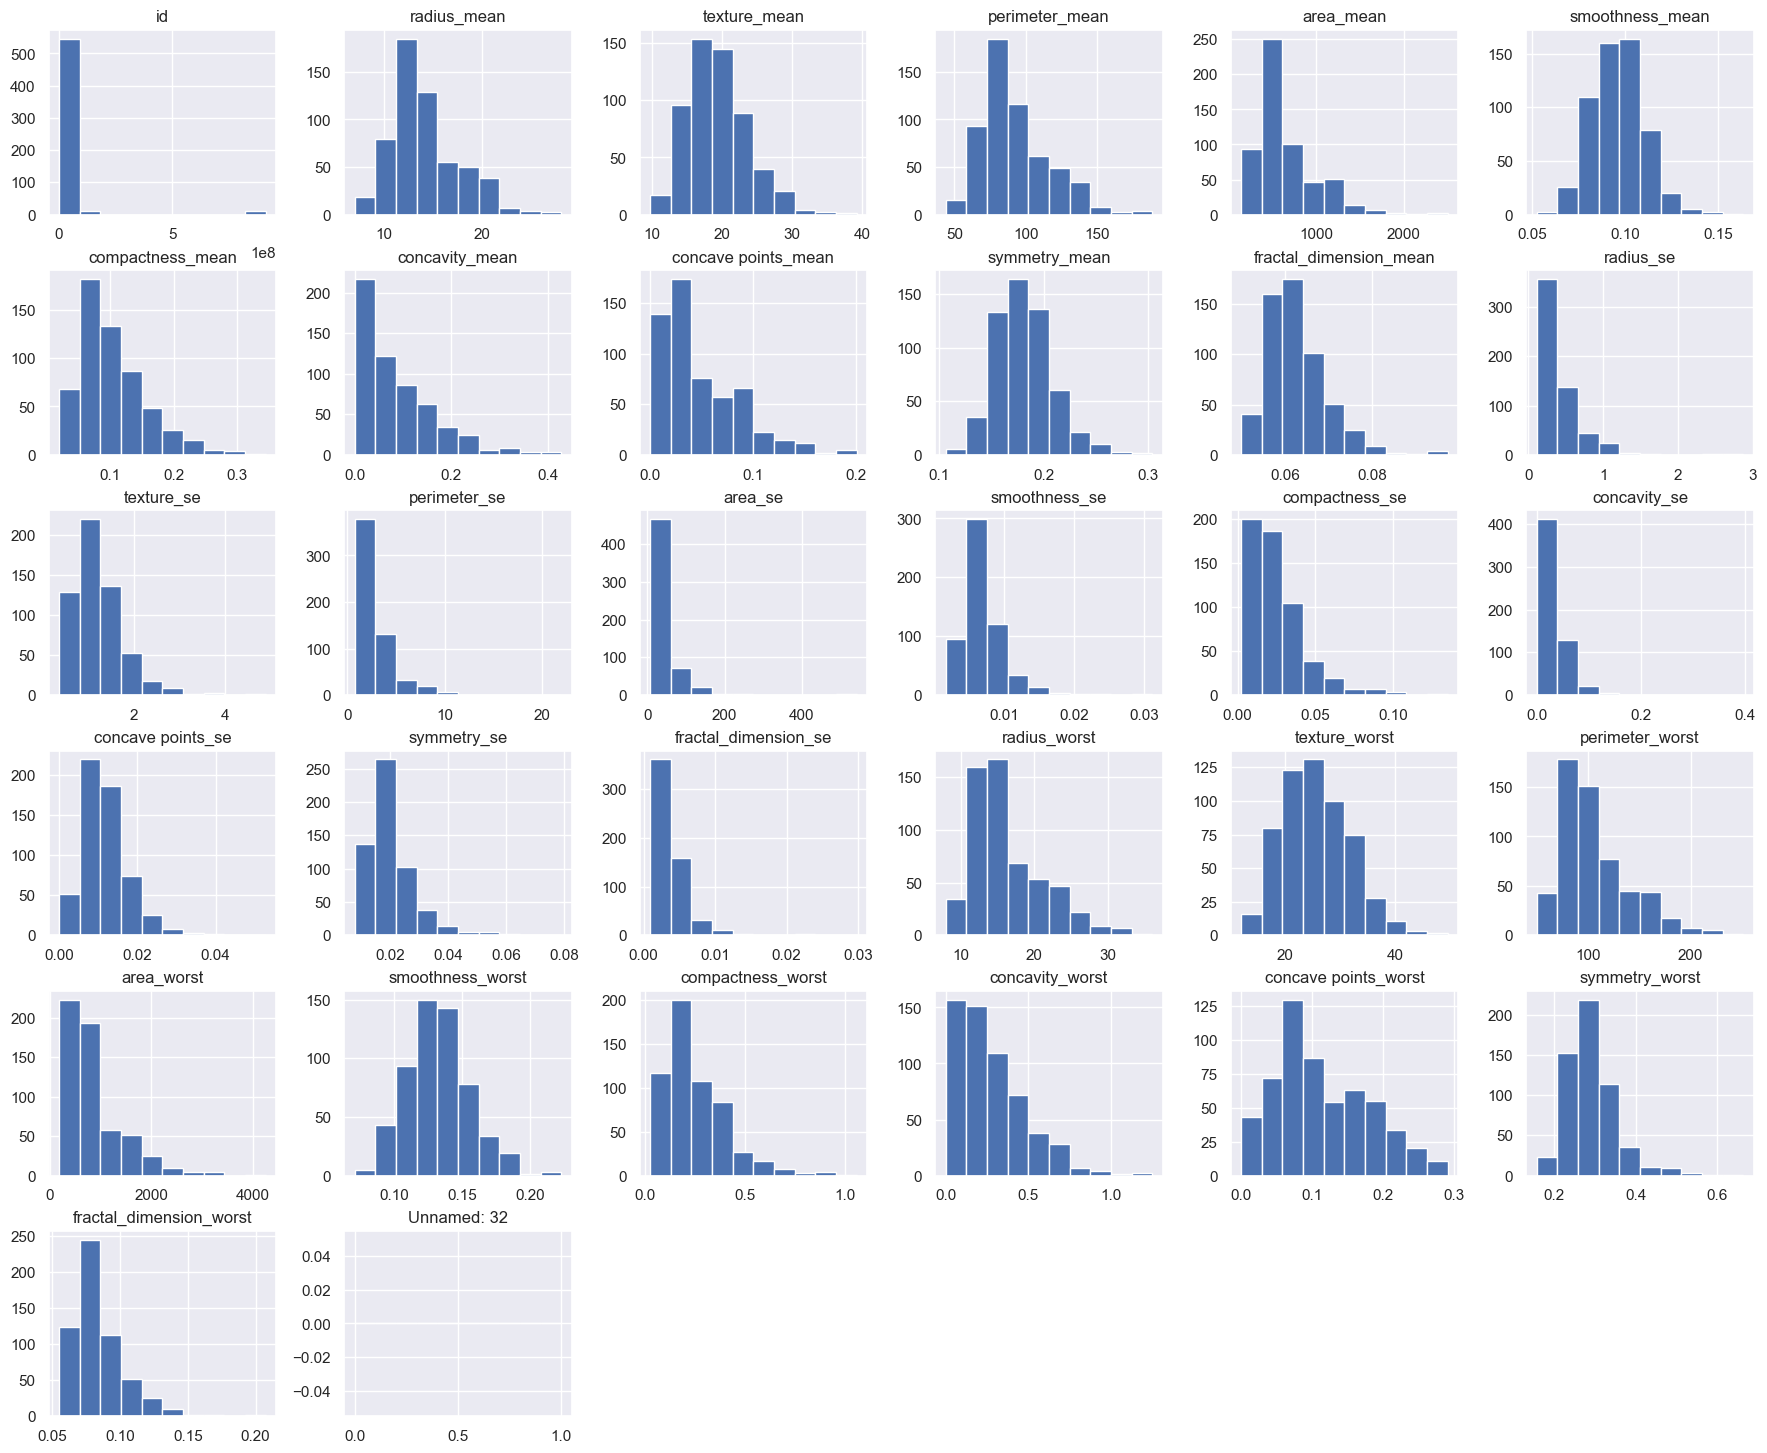

In [4]:
# load the dataset. 
df = pd.read_csv('Cancer_Data.csv')

# assess the data and perform EDA
display(df)
display(df.describe(include='all'))
df.info()

# view duplicates
print('\nNumber of duplicates is:', df.duplicated().sum())

# view the amount of observations for each distinct class
df['diagnosis'].value_counts().plot(kind='bar')
_=plt.xlabel('diagnosis')
_=plt.ylabel('count')

# view histogram for all other columns
_=df.hist(figsize=(22, 18))

**<font color=teal> Observations:</font>**  
-The last column is empty and should be dropped  
-No other missing values  
-All fields have the correct type  
-No duplicates  

In [4]:
# dropping the last column
df.drop('Unnamed: 32', axis=1,inplace=True)
display(df)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


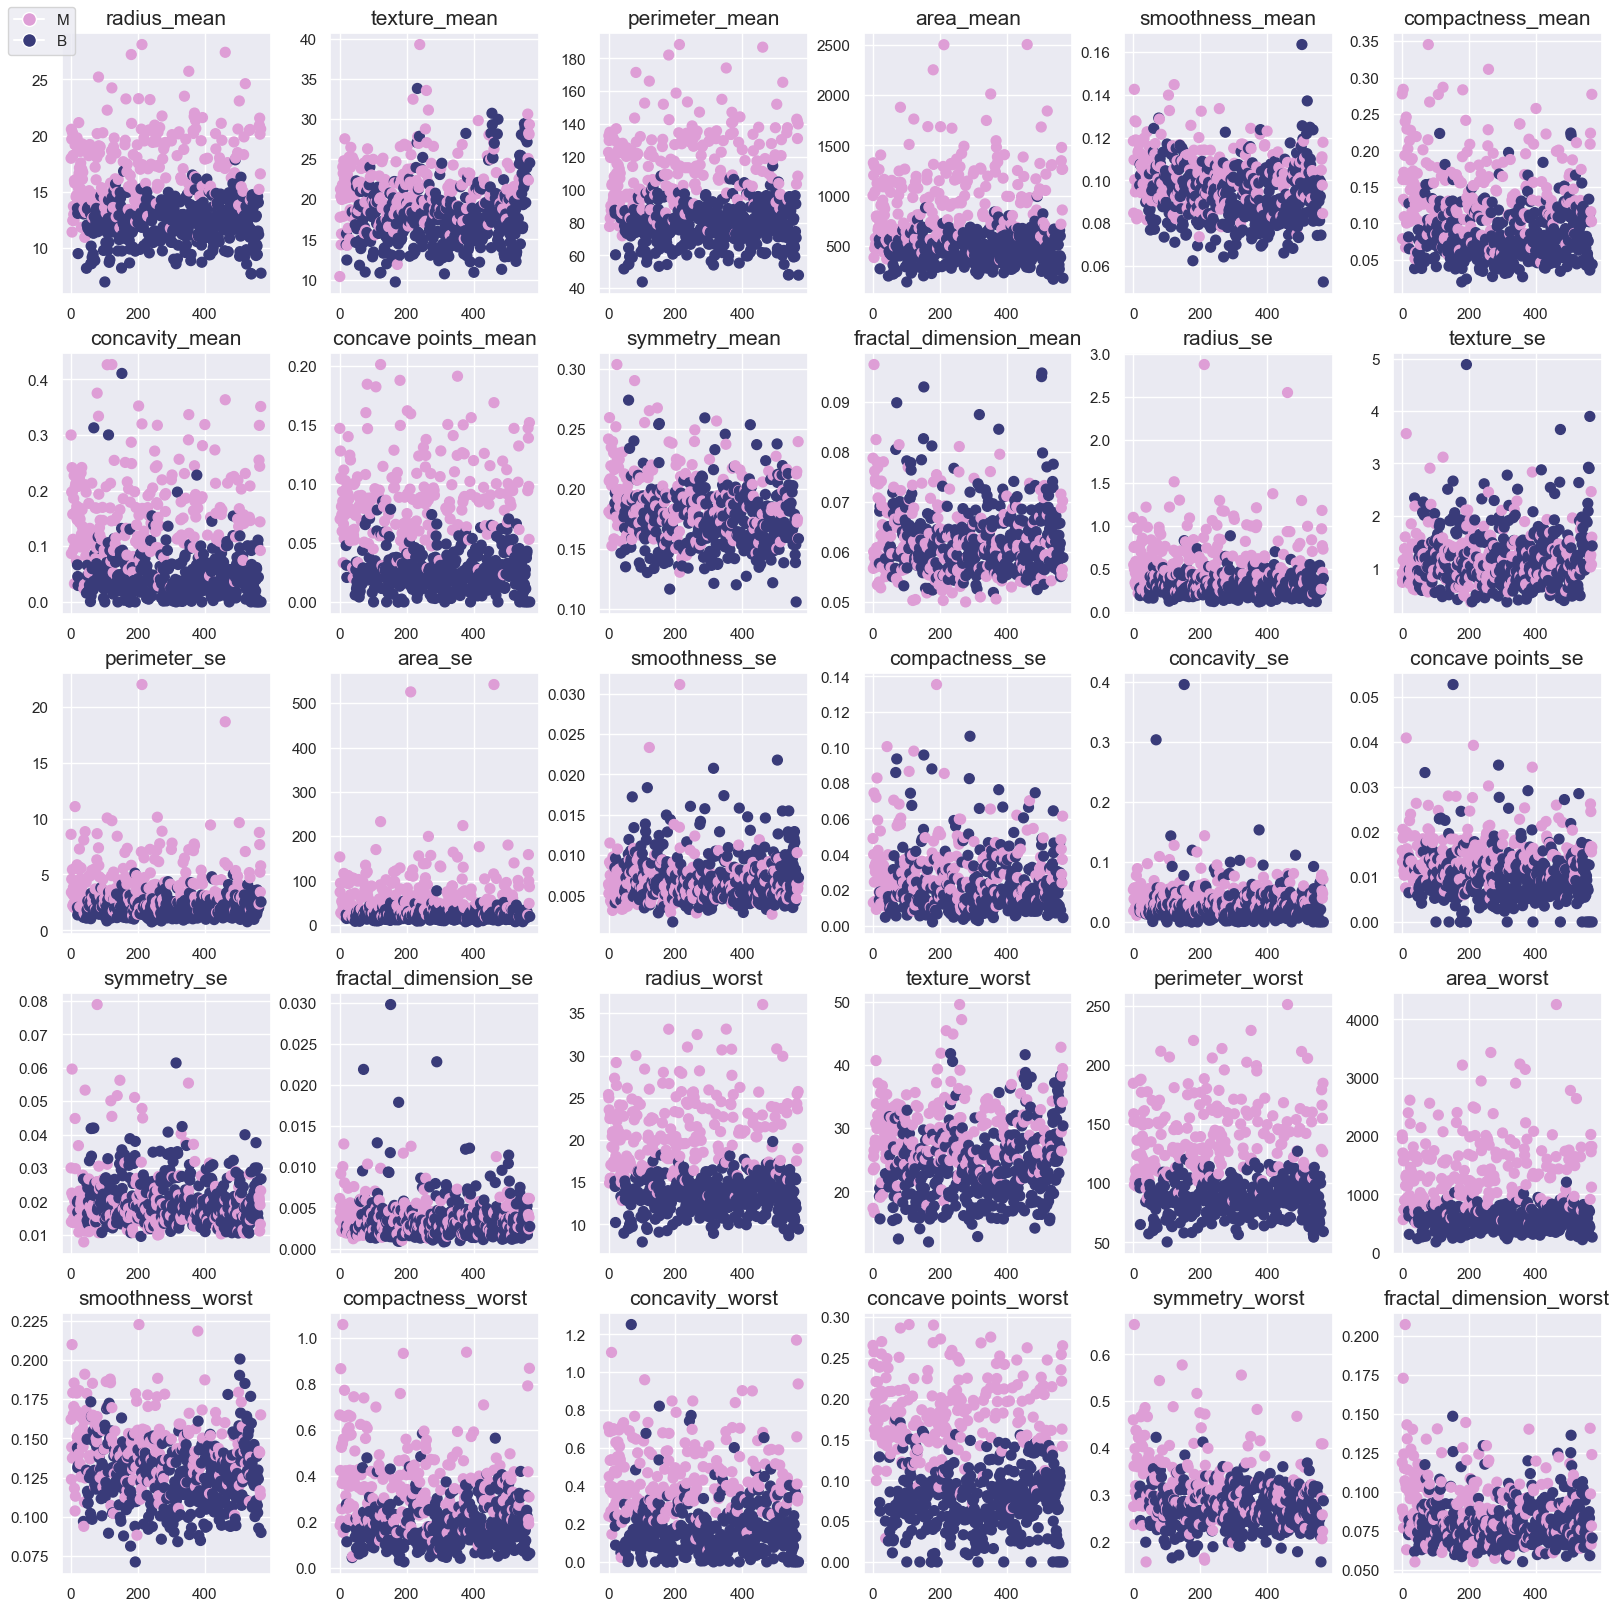

In [36]:
# Plot the various features with label to see if the classes are easily separated
# x axis is the observations, y axis is the value of the feature


# convert the 'diagnosis' so that 1 is M and B is 0.
y = (df['diagnosis'] == 'M').astype(int)

# establish the features
columns = ['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']


# make a plot for each feature
fig, axs = plt.subplots(5, 6, figsize=(16,16), constrained_layout=True)

colors = plt.cm.tab20b 

for i, f in enumerate(columns):
    row = i // 6
    col = i % 6
    _=axs[row,col].scatter(df.index.values, df[f], c = y, s=50, cmap=colors)
    _=axs[row,col].set_title(f, fontsize=15)


# Display a custom legend box for the two classes
line1 = Line2D([], [], color="white", marker='o', markersize=10, markerfacecolor = colors(19))
line2 = Line2D([], [], color="white", marker='o', markersize=10, markerfacecolor = colors(0))
_= fig.legend((line1, line2), ('M', 'B'), loc='upper left')

plt.show()

Some features seem to show separation while others don't. It seems that when the diagnosis is 'M', the values are higher.  
Let's see how well the SVM and random forest perform.

In [6]:
# Set X and y
X = df[columns]
y = (df['diagnosis'] == 'M').astype(int)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)


In [7]:
# Classification with SVM
# ---------------------------------------


# fit the SVM model
model = SVC(kernel='linear')
model.fit(X_train, y_train)

# test the model
y_pred = model.predict(X_test)

# verify
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred),'\n')
print(accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred, average="macro"))  
print(recall_score(y_test, y_pred, average="macro"))
print(f1_score(y_test, y_pred, average="macro"))


Confusion Matrix:
 [[85  5]
 [ 1 52]] 

0.958041958041958
0.9503263973888209
0.9627882599580713
0.9556818181818181


Very good results, our model works well.

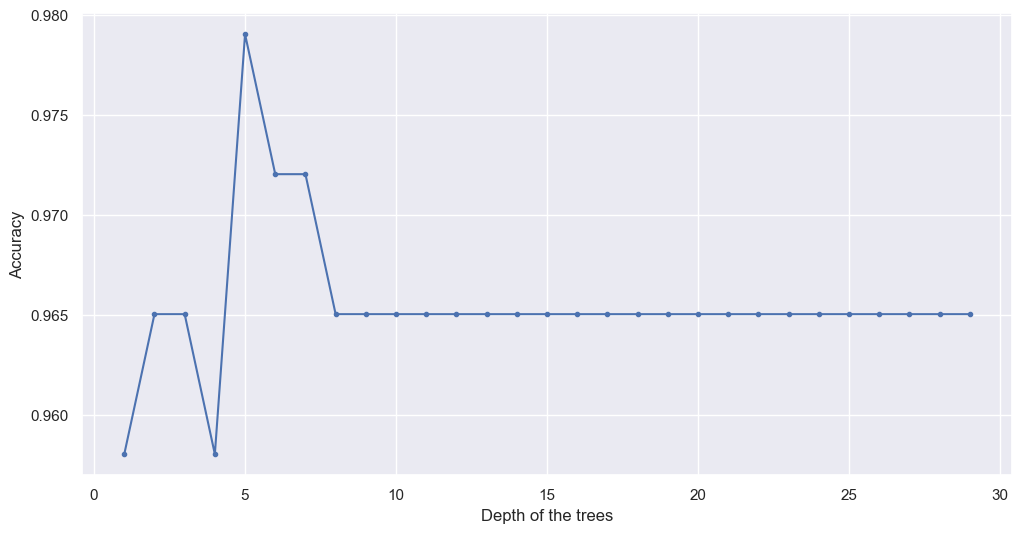

In [10]:
# Classification with random forest
# ---------------------------------------

# For random forest, we need to try multiple depths and see which one is best.
figsize = plt.figure(figsize = (12,6))

acc = []             
depths = np.arange(1, 30)

# Calculate accuracy score on the test set for different depths of the trees
for i in depths :
    # Fit the Regression Tree
    model = RandomForestClassifier(n_estimators=50, max_depth=i, random_state=0)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc.append(accuracy_score(y_test, y_pred))

# Plot results
_=plt.plot(depths, acc, marker='.')
_=plt.xlabel('Depth of the trees')
_=plt.ylabel('Accuracy')

plt.show()

Based on the results, we get the best result when the depth of trees is equal to 5.

In [9]:
# Run the random forest with a depth of 5

model = RandomForestClassifier(n_estimators=50, max_depth=5, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred), '\n')

print(accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred, average="macro"))  
print(recall_score(y_test, y_pred, average="macro"))
print(f1_score(y_test, y_pred, average="macro"))

Confusion Matrix:
 [[88  2]
 [ 1 52]] 

0.9790209790209791
0.9758635039533916
0.9794549266247379
0.9776014201430585


### Results for SVM:
accuracy: 0.958  
precision : 0.950  
recall : 0.962  
f1_score : 0.956  

### Results for Random Forest:
accuracy: 0.979  
precision : 0.976  
recall : 0.979  
f1_score : 0.978


Good results for both but Random Forest is better with its higher accuracy score and higher precision.  
Higher precision is especially important when dealing with a dataset like this one where important medical diagnoses are presented.
<br><br><br>